# Time Series Analysis Part 1

## Imports

In [40]:
# Linear Algebra, Data Manipulation
import numpy as np
import pandas as pd

# Plots
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import chart_studio.plotly as py

## Pandas Datetime Index

In [41]:
pd.date_range("2021-09-01", periods=15, freq="D")

DatetimeIndex(['2021-09-01', '2021-09-02', '2021-09-03', '2021-09-04',
               '2021-09-05', '2021-09-06', '2021-09-07', '2021-09-08',
               '2021-09-09', '2021-09-10', '2021-09-11', '2021-09-12',
               '2021-09-13', '2021-09-14', '2021-09-15'],
              dtype='datetime64[ns]', freq='D')

In [42]:
pd.date_range("Oct 01, 2021", periods=15, freq="D")

DatetimeIndex(['2021-10-01', '2021-10-02', '2021-10-03', '2021-10-04',
               '2021-10-05', '2021-10-06', '2021-10-07', '2021-10-08',
               '2021-10-09', '2021-10-10', '2021-10-11', '2021-10-12',
               '2021-10-13', '2021-10-14', '2021-10-15'],
              dtype='datetime64[ns]', freq='D')

### Converting Strings to Datetime

In [43]:
pd.to_datetime(["10/01/2020", "10/02/2020"]) 
# print format - "year-day-month"

DatetimeIndex(['2020-10-01', '2020-10-02'], dtype='datetime64[ns]', freq=None)

In [44]:
pd.to_datetime(["10/01/2020", "10/02/2020"], format="%d/%m/%Y")
# print format - "year-monts-day"

DatetimeIndex(['2020-01-10', '2020-02-10'], dtype='datetime64[ns]', freq=None)

### Using Dates as Index

In [45]:
arr_1 = np.random.randint(10, 50, size=(3, 3))
date_arr = pd.date_range("2021-01-01", periods=3, freq="D")

df_1 = pd.DataFrame(arr_1, columns=['A', 'B', 'C'], index=date_arr)
df_1

,A,B,C
2021-01-01,37,11,33
2021-01-02,25,48,22
2021-01-03,29,17,30


## Time Resampling

In [46]:
df_aapl = pd.read_csv("./datasets/AAPL.csv")
df_aapl = df_aapl[["Date", "Close", "Volume"]]
df_aapl.head()

,Date,Close,Volume
0,2020-10-19,115.980003,120639300
1,2020-10-20,117.510002,124423700
2,2020-10-21,116.870003,89946000
3,2020-10-22,115.750000,101988000
4,2020-10-23,115.040001,82572600


In [47]:
# Plotting Data using Plotly
px.line(df_aapl, x="Date", y="Close", labels={"x": "Date", "y": "Price"})

In [48]:
df_aapl = pd.read_csv("AAPL.csv", index_col="Date", parse_dates=True)[[ "Close", "Volume"]]
df_aapl.rename(columns={"Close": "Price"}, inplace=True)
df_aapl

,Price,Volume
Date,,
2020-10-19,115.980003,120639300
2020-10-20,117.510002,124423700
2020-10-21,116.870003,89946000
2020-10-22,115.750000,101988000
2020-10-23,115.040001,82572600
...,...,...
2021-10-11,142.809998,64452200
2021-10-12,141.509995,73035900
2021-10-13,140.910004,78762700


### min, max, mean, std, etc., values for the year
### As our Data has two years data i.e., 2020 and 2021 we get two rows

### A --> Annually
### M --> Monthly
### W --> Weekly
### SM --> Half a Month
### Q --> Quarterly
### 2M --> Every 2 Months

In [49]:
df_aapl.resample(rule="A").mean()

,Price,Volume
Date,,
2020-12-31,120.867115,1.086405e+08
2021-12-31,135.577236,9.015901e+07


In [50]:
df_aapl.resample(rule="A").std() # Standard Deviation

,Price,Volume
Date,,
2020-12-31,6.752855,3.237514e+07
2021-12-31,9.834273,2.727454e+07


In [51]:
df_aapl.resample(rule="M").std()

,Price,Volume
Date,,
2020-10-31,2.703800,3.278857e+07
2020-11-30,3.061705,3.159140e+07
2020-12-31,4.788467,3.316665e+07
2021-01-31,5.443387,2.677040e+07
2021-02-28,5.295127,3.032472e+07
2021-03-31,2.413855,2.833415e+07
2021-04-30,3.346041,1.854549e+07
2021-05-31,2.232477,2.090217e+07
2021-06-30,4.052130,1.428547e+07


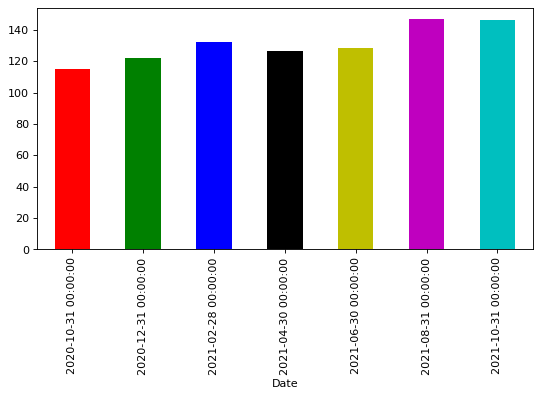

In [52]:
plt.figure(figsize=(8, 4), dpi=80)
df_aapl["Price"].resample(rule="2M").mean().plot.bar(color=list("rgbkymc"))
plt.show()

## Moving Averages

In [53]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_aapl.Price.index,
    y=df_aapl.Price,
    mode='lines',
    name="Stock Price"))

fig.add_trace(go.Scatter(
    x=df_aapl.rolling(window=7).mean().index,
    y=df_aapl.rolling(window=7).mean()["Price"],
    mode='lines',
    name="Moving Avg")) # mean of values for 7 days 

fig.update_layout(
    height=500,
)

In [54]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_aapl.Price.index,
    y=df_aapl.Price,
    mode='lines',
    name="Stock Price"))

fig.add_trace(go.Scatter(
    x=df_aapl.rolling(window=28).mean().index,
    y=df_aapl.rolling(window=28).mean()["Price"],
    mode='lines',
    name="Moving Avg")) # mean of values for 30 days / 1 Month 

fig.update_layout(
    height=500,
)

In [55]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_aapl.Price.index,
    y=df_aapl.Price,
    mode='lines',
    name="Stock Price"))

fig.add_trace(go.Scatter(
    x=df_aapl.expanding().mean().index,
    y=df_aapl.expanding().mean()["Price"],
    mode='lines',
    name="Moving Avg")) # mean of values for 30 days / 1 Month 

fig.update_layout(
    height=500,
)

## Shifting Time Data

In [58]:
df_aapl.shift(1) # Shift all data 1 row down. -1 for shifting 1 row up

,Price,Volume
Date,,
2020-10-19,NaN,NaN
2020-10-20,115.980003,120639300.0
2020-10-21,117.510002,124423700.0
2020-10-22,116.870003,89946000.0
2020-10-23,115.750000,101988000.0
...,...,...
2021-10-11,142.899994,58718700.0
2021-10-12,142.809998,64452200.0
2021-10-13,141.509995,73035900.0


In [59]:
df_aapl.shift(-1)

,Price,Volume
Date,,
2020-10-19,117.510002,124423700.0
2020-10-20,116.870003,89946000.0
2020-10-21,115.750000,101988000.0
2020-10-22,115.040001,82572600.0
2020-10-23,115.050003,111850700.0
...,...,...
2021-10-11,141.509995,73035900.0
2021-10-12,140.910004,78762700.0
2021-10-13,143.759995,69907100.0
